In [60]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [61]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from sqlalchemy import and_


In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()


In [8]:
# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()
base = automap_base()
base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
print(base.classes.keys())




['measurement', 'station']


In [10]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
results = session.query(Measurement).order_by(Measurement.date.desc())
most_recent_date = results[0].date
most_recent_date

'2017-08-23'

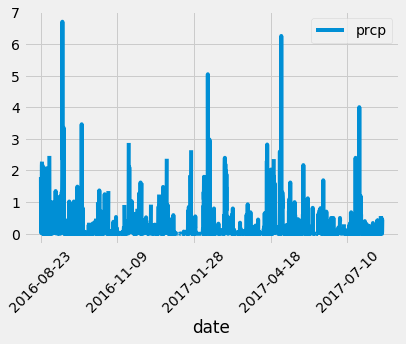

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date_obj = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
last_year_obj = most_recent_date_obj - dt.timedelta(days=365)


# Calculate the date one year from the last date in data set.
last_year_date = last_year_obj.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
measurements = session.query(Measurement).filter(and_(Measurement.date >= last_year_date)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame([measurement.__dict__ for measurement in measurements]).set_index(['date'])

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='prcp', rot=45)



In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.read_sql("SELECT prcp FROM measurement", connection)
df[["prcp"]].describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
total_station = pd.read_sql("SELECT count(station) FROM station", connection)
total_station

,count(station)
0,9


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
top_station = pd.read_sql("select station, count(station) as number from measurement group by station order by number desc limit 1", connection)
print(top_station)
# List the stations and the counts in descending order.
station_list = pd.read_sql("select station, count(station) as number from measurement group by station order by number desc", connection)
station_list


       station  number
0  USC00519281    2772


,station,number
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_id = top_station['station'].iloc[0]
temp_stats = pd.read_sql(f"select min(tobs), max(tobs), avg(tobs) from measurement where station = '{top_station_id}'", connection)
temp_stats

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


Text(0.5, 0, 'Temperature')

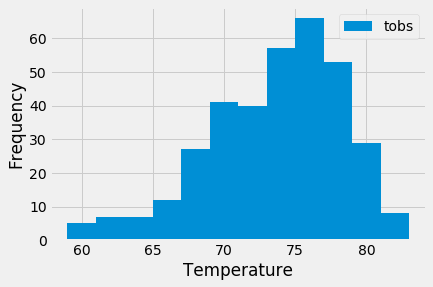

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = pd.read_sql(f"select tobs from measurement where station = '{top_station_id}' and date <= '{most_recent_date}' and date >= '{last_year_date}'", connection)

temps.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()